![](resource/ECG.gif)
<p style="text-align: center;">
    <a href="https://www.sevencountriesstudy.com/ecg-predictors-and-coronary-heart-disease/">[image source]</a>
</p>

## Background

### Aritmia
> Aritmia adalah suatu tanda atau gejala dari gangguan detak jantung atau irama jantung.[1] Hal ini bisa dirasakan ketika misalnya, jantung berdetak lebih cepat dari normal yang selanjutnya disebut takikardia atau ketika jantung berdetak lebih lambat dari normal, yang disebut sebagai bradikardia.[1] Jantung yang berdenyut melambat tentu akan mengganggu aliran darah sampai ke otak sehingga penderitanya sewaktu-waktu dapat pingsan.[2] Sebaliknya, jika jantung berdenyut terlalu cepat dalam jangka yang lama maka dapat mengarah pada gagal jantung kongestif yang tentunya sangat berbahaya.[2] Aritmia timbul bilamana penghantaran listrik pada jantung yang mengontrol detak jantung mengalami gangguan, ini dapat terjadi bila sel saraf khusus yang ada pada jantung yang bertugas menghantarkan listrik tersebut tidak bekerja dengan baik.[1] Aritmia juga dapat terjadi bila bagian lain dari jantung menghantarkan sinyal listrik yang abnormal.[1] (https://id.wikipedia.org/wiki/Aritmia)


### Elektrokardiogram (EKG) atau Electrocardiogram (ECG)

>EKG atau ECG (electrocardiogram) merupakan sinyal yang didapat dari aktivitas gelombang listrik yang dihasilkan oleh jantung. Sinyal EKG terdiri dari gelombang P, kompleks QRS, dan gelombang T digunakan untuk mendeteksi kelainan jantung atau aritmia. Urutan terjadinya sinyal EKG yang dapat menimbulkan gelombang P, kompleks QRS, dan gelombang T [sumber](https://journal.uii.ac.id/jurnal-teknoin/article/download/4651/4098).
1. Gelombang P, terjadi akibat kontraksi otot atrium , gelombang ini relative kecil karena otot atrium yang relative tipis.
2. Gelombang QRS, trejadi akibat kontraksi otot ventrikel yang tebal sehingga gelombang QRS cukup tinggi. Gelombang Q merupakan depleksi pertama kebawah. Selanjutnya depleksi ke atas adalah gelombang R. Depleksi kebawah setelah gelombang R disebut gelombang S.
3. Gelombang T, terjadi akibat kembalinya otot ventrikel ke keadaan listrik istirahat.


### ECG Dataset
#### Download dataset : 
- Test : https://www.kaggle.com/shayanfazeli/heartbeat/data?select=mitbih_test.csv
- Train : https://www.kaggle.com/shayanfazeli/heartbeat/data?select=mitbih_train.csv

```
Number of Samples: 109446
Number of Categories: 5
Sampling Frequency: 125Hz
Data Source: Physionet's MIT-BIH Arrhythmia Dataset
Classes: ['N': 0, 'S': 1, 'V': 2, 'F': 3, 'Q': 4]
```


- Original Sourcecode : https://www.kaggle.com/gregoiredc/arrhythmia-on-ecg-classification-using-cnn
- Original Source Dataset : https://physionet.org/content/mitdb/1.0.0/

# Load dataset

In [1]:
import os
# disable GPU
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

dataset_folder = 'dataset/'
filenames = []
for filename in os.listdir(dataset_folder):
        filenames.append(filename)

In [2]:
filenames

['mitbih_test.csv',
 'mitbih_train.csv',
 'ptbdb_abnormal.csv',
 'ptbdb_normal.csv']

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.utils import class_weight

from keras.utils.np_utils import to_categorical


Using TensorFlow backend.


In [4]:
train_df=pd.read_csv(dataset_folder + 'mitbih_train.csv',header=None)
test_df=pd.read_csv(dataset_folder + 'mitbih_test.csv',header=None)

In [5]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
0,0.977941,0.926471,0.681373,0.245098,0.154412,0.191176,0.151961,0.085784,0.058824,0.049020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Balancing Dataset

In [6]:
#print dataset distribution

train_df[187]=train_df[187].astype(int)
equilibre=train_df[187].value_counts()

print(equilibre)

0    72471
4     6431
2     5788
1     2223
3      641
Name: 187, dtype: int64


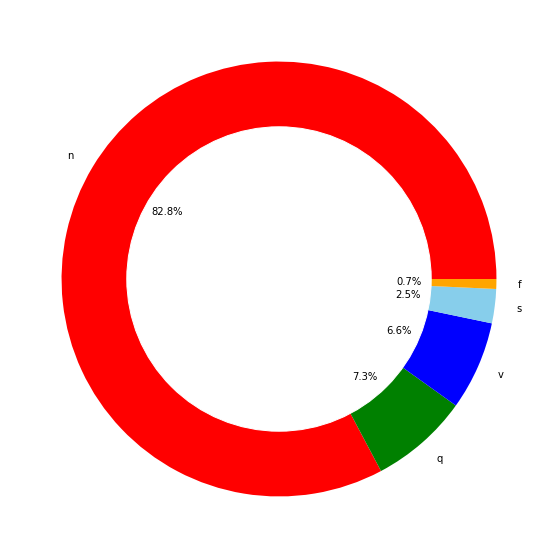

In [7]:
plt.figure(figsize=(20,10))

my_circle = plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, 
        labels=['n','q','v','s','f'], 
        colors=['red','green','blue','skyblue','orange'],
        autopct='%1.1f%%')

p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

In [8]:
# sampling and resampling dataset

from sklearn.utils import resample
n_samples = 20000 
random_states = [42, 123, 124, 125, 126]

dfs = []

for i in range(len(equilibre)):
    dfs.append(train_df[train_df[187]==i])
    if(equilibre[i] > n_samples) :
        dfs[i]=dfs[i].sample(n=n_samples ,random_state=random_states[i])
    else :
        dfs[i]=resample(dfs[i],replace=True,n_samples=n_samples,random_state=random_states[i])

train_df=pd.concat(dfs)

In [9]:
train_df.head()

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
10153,0.162791,0.540698,0.755814,0.186047,0.168605,0.546512,0.616279,0.697674,0.651163,0.703488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
33886,0.990066,0.938742,0.344371,0.034768,0.273179,0.331126,0.326159,0.341060,0.347682,0.347682,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
32005,0.974239,0.932084,0.590164,0.131148,0.014052,0.168618,0.238876,0.210773,0.196721,0.208431,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
56159,0.978495,0.723118,0.526882,0.298387,0.220430,0.158602,0.091398,0.091398,0.080645,0.083333,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
61783,0.963351,0.709424,0.060209,0.013089,0.057592,0.041885,0.047120,0.034031,0.039267,0.044503,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [10]:
# cek ulang distribusi dataset setelah proses balancing

equilibre=train_df[187].value_counts()

print(equilibre)

4    20000
3    20000
2    20000
1    20000
0    20000
Name: 187, dtype: int64


# Classes

In [11]:
c=train_df.groupby(187,group_keys=False).apply(lambda train_df : train_df.sample(1))

In [12]:
c

,0,1,2,3,4,5,6,7,8,9,...,178,179,180,181,182,183,184,185,186,187
39885,1.000000,0.854839,0.164516,0.003226,0.093548,0.219355,0.235484,0.258065,0.267742,0.277419,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
72870,0.929204,0.831858,0.221239,0.030973,0.101770,0.159292,0.123894,0.141593,0.216814,0.172566,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
77540,0.931200,0.932800,0.891200,0.568000,0.340800,0.267200,0.227200,0.184000,0.158400,0.137600,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
80828,1.000000,0.845745,0.571809,0.259309,0.077128,0.095745,0.091755,0.057181,0.051862,0.049202,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
87256,0.784173,0.755396,0.705036,0.690647,0.687050,0.651079,0.629496,0.568345,0.492806,0.363309,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4


In [68]:
def plot_hist(class_number,size,min_):
    img=train_df.loc[train_df[187]==class_number].values
    img=img[:,min_:size]
    img_flatten=img.flatten()

    final1=np.arange(min_,size)
    for i in range (img.shape[0]-1):
        tempo1=np.arange(min_,size)
        final1=np.concatenate((final1, tempo1), axis=None)
    print(len(final1))
    print(len(img_flatten))
    plt.hist2d(final1,img_flatten, bins=(80,80),cmap=plt.cm.jet)
    plt.show()

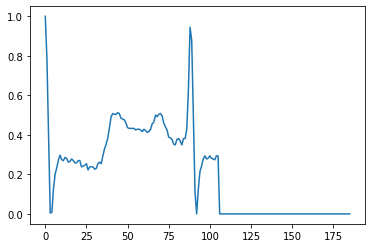

In [67]:
 plt.plot(c.iloc[0,:186])

1300000
1300000


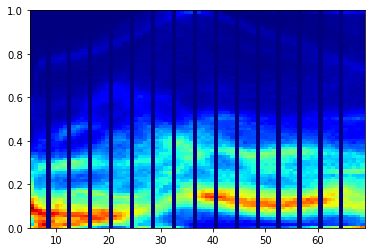

In [69]:
plot_hist(0,70,5)

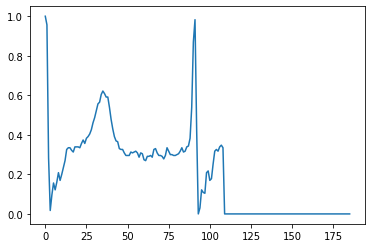

In [70]:
plt.plot(c.iloc[1,:186])

900000
900000


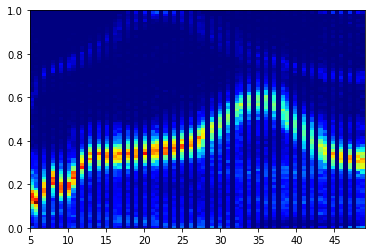

In [71]:
plot_hist(1,50,5)

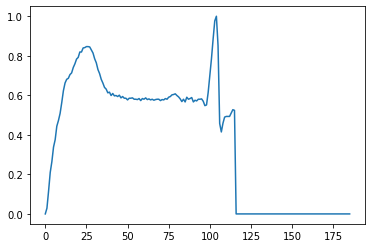

In [72]:
plt.plot(c.iloc[2,:186])

600000
600000


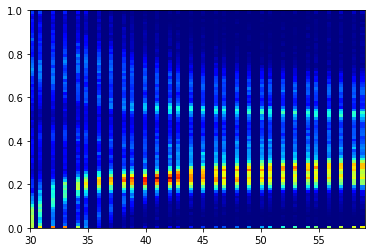

In [73]:
plot_hist(2,60,30)

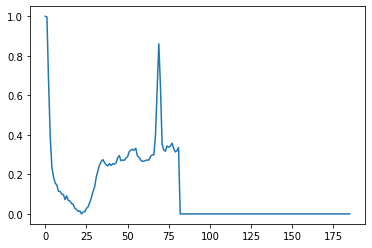

In [74]:
plt.plot(c.iloc[3,:186])

700000
700000


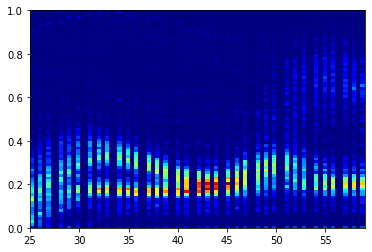

In [75]:
plot_hist(3,60,25)

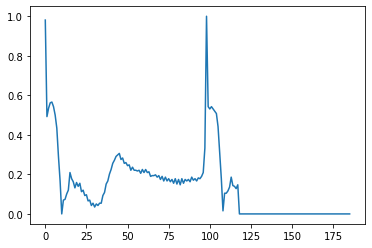

In [76]:
plt.plot(c.iloc[4,:186])

640000
640000


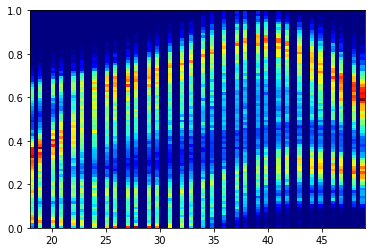

In [77]:
plot_hist(4,50,18)

# Add Noise

In [13]:
def add_gaussian_noise(signal):
    noise=np.random.normal(0,0.05,186)
    return (signal+noise)

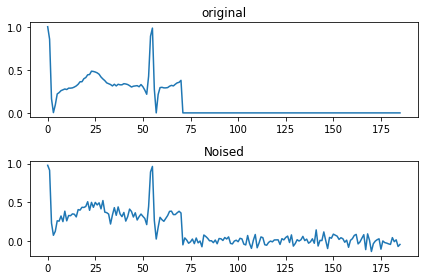

In [14]:
tempo=c.iloc[0,:186]
bruiter=add_gaussian_noise(tempo)

plt.subplot(2,1,1)

plt.plot(c.iloc[0,:186])
plt.title("original")

plt.subplot(2,1,2)
plt.plot(bruiter)
plt.title("Noised")

plt.tight_layout()
plt.show()

In [15]:
target_train=train_df[187]
target_test=test_df[187]
y_train=to_categorical(target_train)
y_test=to_categorical(target_test)

In [16]:
X_train=train_df.iloc[:,:186].values
X_test=test_df.iloc[:,:186].values

X_train = X_train.reshape(len(X_train), X_train.shape[1],1)
X_test = X_test.reshape(len(X_test), X_test.shape[1],1)

# Network

In [17]:
def network(X_train,y_train,X_test,y_test):
    

    im_shape=(X_train.shape[1],1)
    
    inputs_cnn=Input(shape=(im_shape), 
                     name='inputs_cnn')
    conv1_1=Convolution1D(64, 
                          (6), 
                          activation='relu', 
                          input_shape=im_shape)(inputs_cnn)
    
    conv1_1=BatchNormalization()(conv1_1)
    pool1=MaxPool1D(pool_size=(3), 
                    strides=(2), 
                    padding="same")(conv1_1)
    
    conv2_1=Convolution1D(64, 
                          (3), 
                          activation='relu', 
                          input_shape=im_shape)(pool1)
    
    conv2_1=BatchNormalization()(conv2_1)
    pool2=MaxPool1D(pool_size=(2), 
                    strides=(2), 
                    padding="same")(conv2_1)
    conv3_1=Convolution1D(64, 
                          (3), 
                          activation='relu', 
                          input_shape=im_shape)(pool2)
    
    conv3_1=BatchNormalization()(conv3_1)
    pool3=MaxPool1D(pool_size=(2), 
                    strides=(2), 
                    padding="same")(conv3_1)
    
    flatten=Flatten()(pool3)
    
    dense_end1 = Dense(64, 
                       activation='relu')(flatten)
    dense_end2 = Dense(32, 
                       activation='relu')(dense_end1)
    main_output = Dense(5, 
                        activation='softmax', 
                        name='main_output')(dense_end2)
    
    model = Model(inputs = inputs_cnn, 
                  outputs=main_output)
    
    model.compile(optimizer='adam', 
                  loss='categorical_crossentropy',
                  metrics = ['accuracy'])
    
    callbacks = [EarlyStopping(monitor='val_loss', patience=8),
                 ModelCheckpoint(filepath='best_model.h5', monitor='val_loss', save_best_only=True)]

    history=model.fit(X_train, 
                      y_train,
                      epochs=40,
                      callbacks=callbacks, 
                      batch_size=32,
                      validation_data=(X_test,y_test))
    model.load_weights('best_model.h5')
    return(model,history)

In [18]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['0','1','2','3','4']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [19]:
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout
from keras.layers import Input
from keras.models import Model
from keras.layers.normalization import BatchNormalization
import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

model,history=network(X_train,y_train,X_test,y_test)

Train on 100000 samples, validate on 21892 samples
Epoch 1/40
100000/100000 [==============================] - 145s 1ms/step - loss: 0.1935 - accuracy: 0.9315 - val_loss: 0.1861 - val_accuracy: 0.9371
Epoch 2/40
100000/100000 [==============================] - 133s 1ms/step - loss: 0.0760 - accuracy: 0.9744 - val_loss: 0.1636 - val_accuracy: 0.9485
Epoch 3/40
100000/100000 [==============================] - 134s 1ms/step - loss: 0.0508 - accuracy: 0.9828 - val_loss: 0.1160 - val_accuracy: 0.9650
Epoch 4/40
100000/100000 [==============================] - 136s 1ms/step - loss: 0.0370 - accuracy: 0.9879 - val_loss: 0.1366 - val_accuracy: 0.9625
Epoch 5/40
100000/100000 [==============================] - 129s 1ms/step - loss: 0.0310 - accuracy: 0.9899 - val_loss: 0.1320 - val_accuracy: 0.9666
Epoch 6/40
100000/100000 [==============================] - 130s 1ms/step - loss: 0.0236 - accuracy: 0.9922 - val_loss: 0.1470 - val_accuracy: 0.9684
Epoch 7/40
100000/100000 [=======================

# Evaluate Model

Accuracy: 96.50%


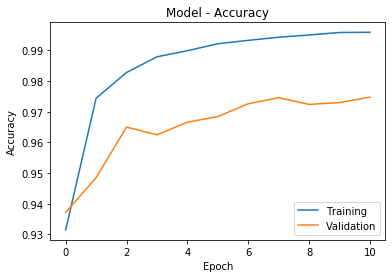

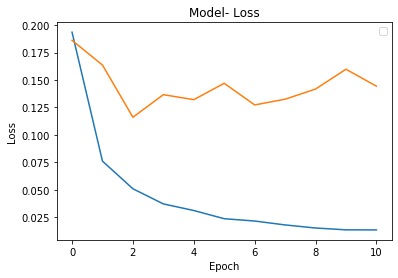

In [20]:
evaluate_model(history,X_test,y_test,model)
y_pred=model.predict(X_test)

Normalized confusion matrix


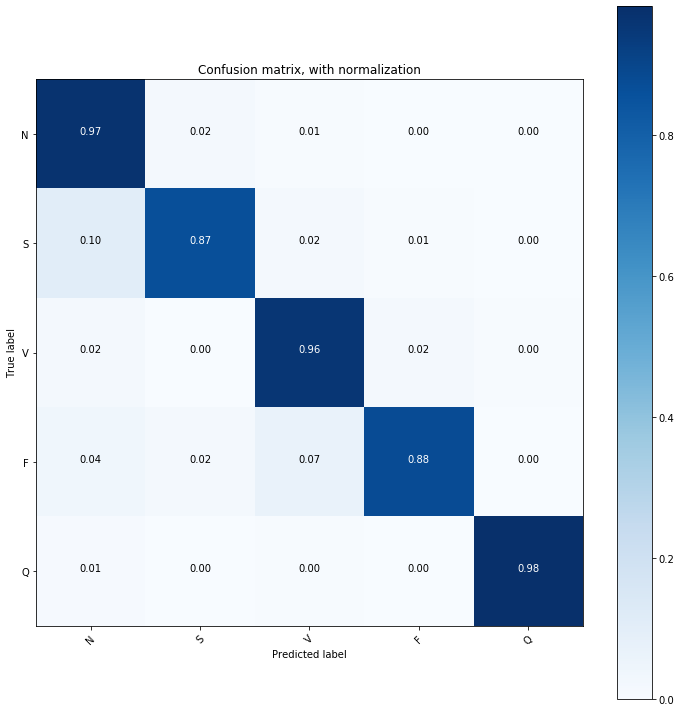

In [21]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10, 10))
plot_confusion_matrix(cnf_matrix, classes=['N', 'S', 'V', 'F', 'Q'],normalize=True,
                      title='Confusion matrix, with normalization')
plt.show()